In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
jap = pd.read_csv("업종별/일식 음식점업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(jap.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539071 entries, 0 to 539070
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      539071 non-null  object
 1   CARD_SIDO_NM  539071 non-null  object
 2   CARD_CCG_NM   537898 non-null  object
 3   STD_CLSS_NM   539071 non-null  object
 4   HOM_SIDO_NM   539071 non-null  object
 5   HOM_CCG_NM    536494 non-null  object
 6   AGE           539071 non-null  object
 7   SEX_CTGO_CD   539071 non-null  int64 
 8   FLC           539071 non-null  int64 
 9   CSTMR_CNT     539071 non-null  int64 
 10  AMT           539071 non-null  int64 
 11  CNT           539071 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 53.5+ MB
None


In [4]:
#안쓰는 컬럼 드랍
df=jap.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [5]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539071 entries, 0 to 539070
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      539071 non-null  object
 1   CARD_SIDO_NM  539071 non-null  object
 2   HOM_SIDO_NM   539071 non-null  object
 3   AGE           539071 non-null  object
 4   SEX_CTGO_CD   539071 non-null  int64 
 5   FLC           539071 non-null  int64 
 6   CSTMR_CNT     539071 non-null  int64 
 7   AMT           539071 non-null  int64 
 8   CNT           539071 non-null  int64 
 9   year          539071 non-null  int64 
 10  month         539071 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 49.4+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  10s            1    1          3   
1   201901           강원          강원  20s            1    1        194   
2   201901           강원          강원  20s            1  

In [7]:
df.CARD_SIDO_NM.unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [8]:
df.HOM_SIDO_NM.unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '서울', '세종', '울산', '인천',
       '전북', '충남', '충북', '부산', '제주', '전남'], dtype=object)

CARD_SIDO_NM
세종      2288769570
울산     11850440138
충북     12569816914
광주     13202388790
대전     13728742089
전남     16360677135
경북     17772388813
제주     19719812635
전북     20609220909
충남     22348384461
강원     28470111635
경남     36458896143
대구     36654034141
인천     38008947379
부산     60356952212
경기    161559434323
서울    280382690828
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

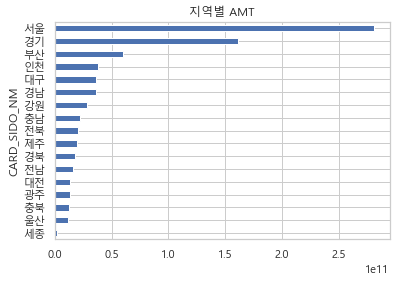

In [9]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901    56720672816
201902    50047483441
201903    58833096118
201904    53767894170
201905    58675323015
201906    55558926327
201907    51504990147
201908    52337253731
201909    50014341452
201910    55033069468
201911    52530194257
201912    66107332757
202001    52789878836
202002    40930204259
202003    37491047321
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

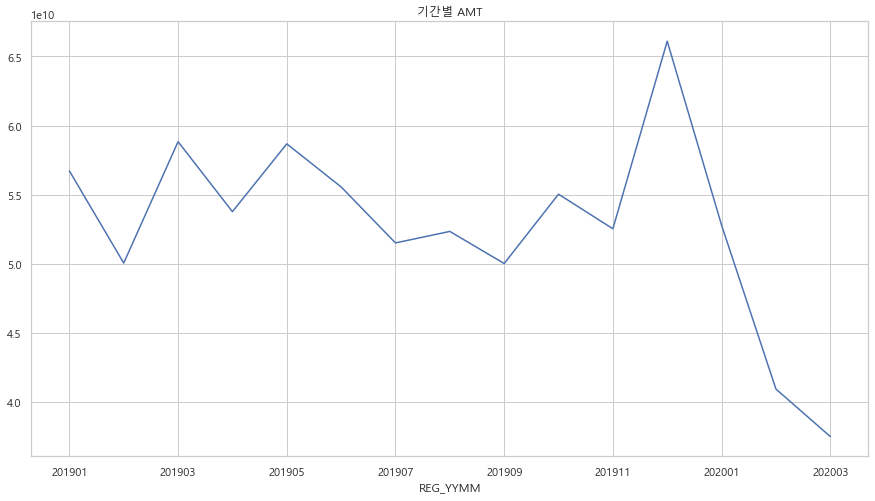

In [10]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

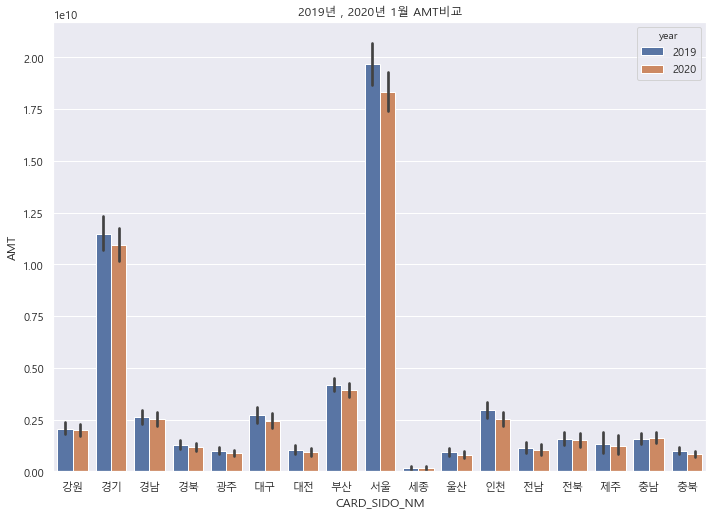

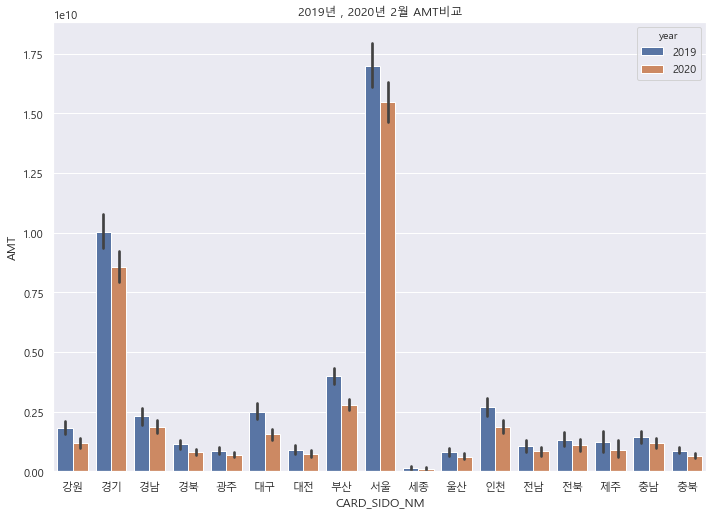

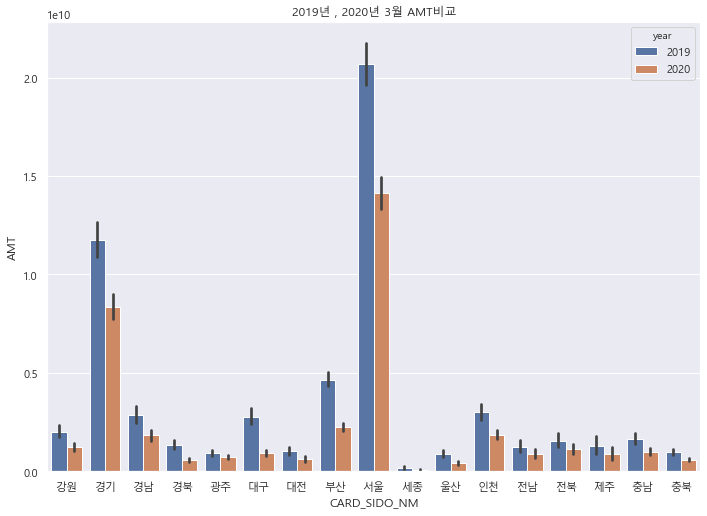

In [11]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

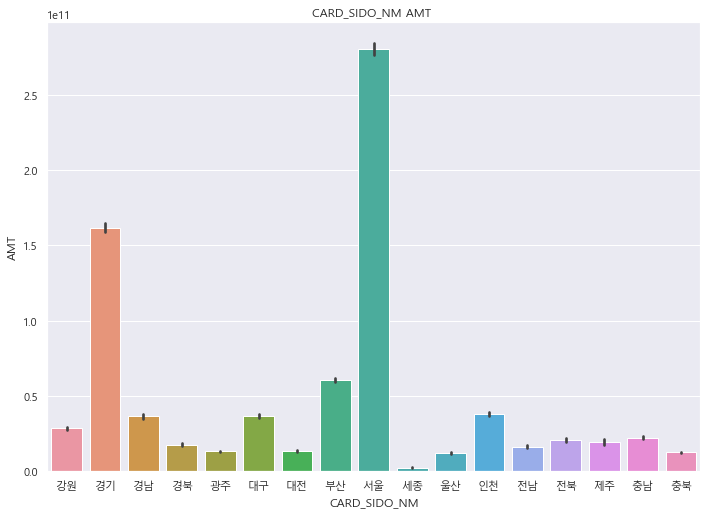

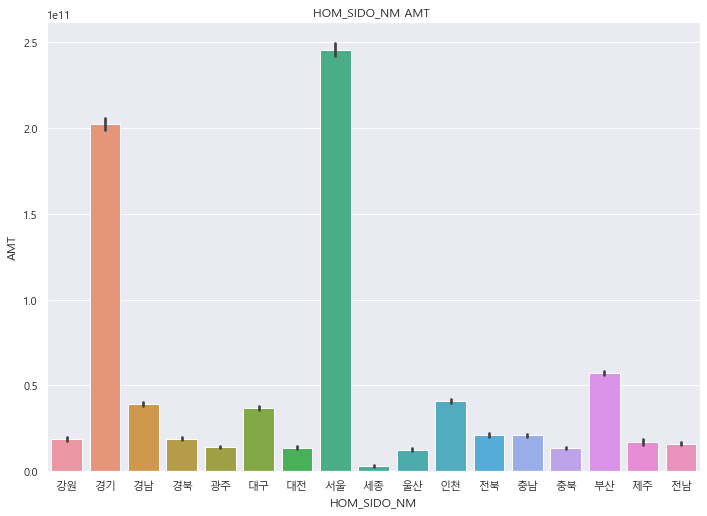

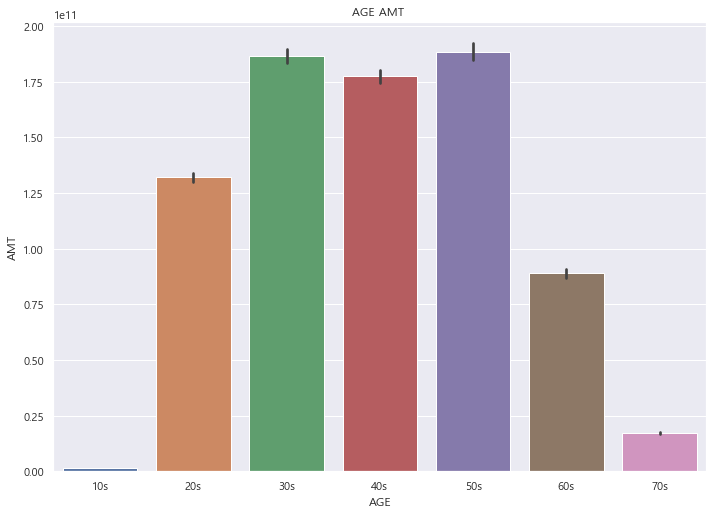

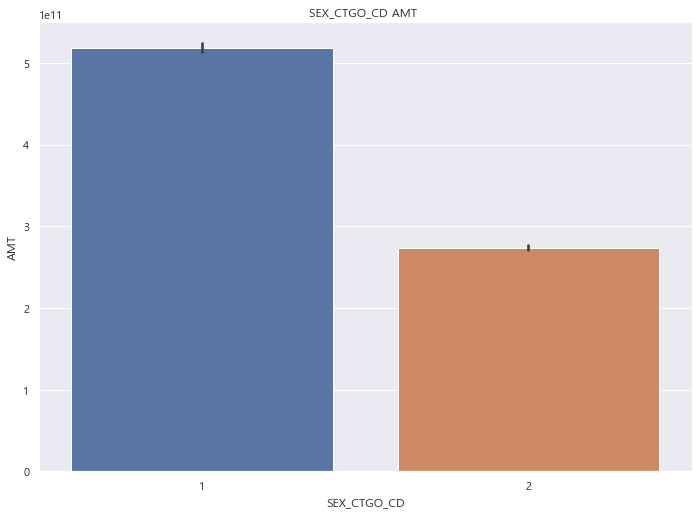

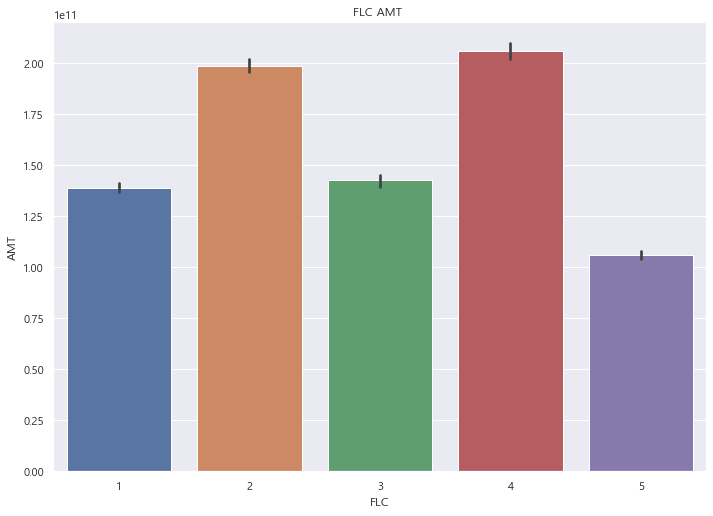

In [12]:
cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()

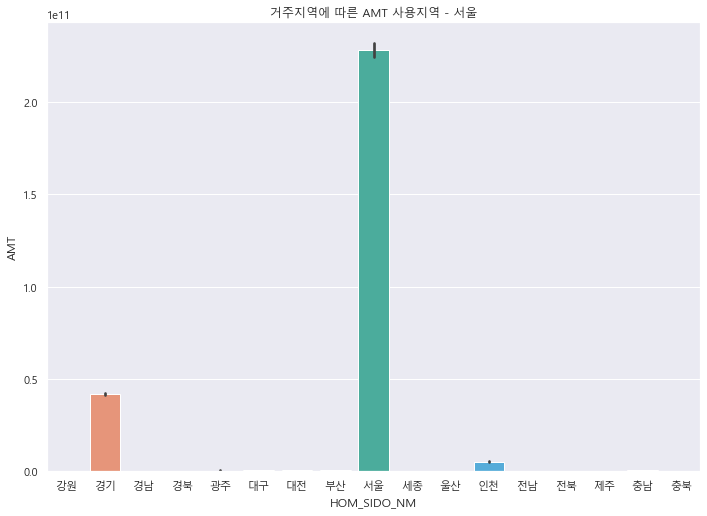

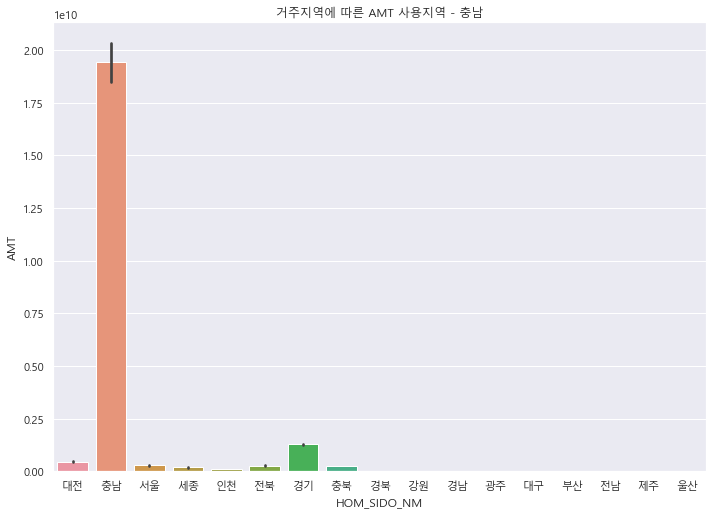

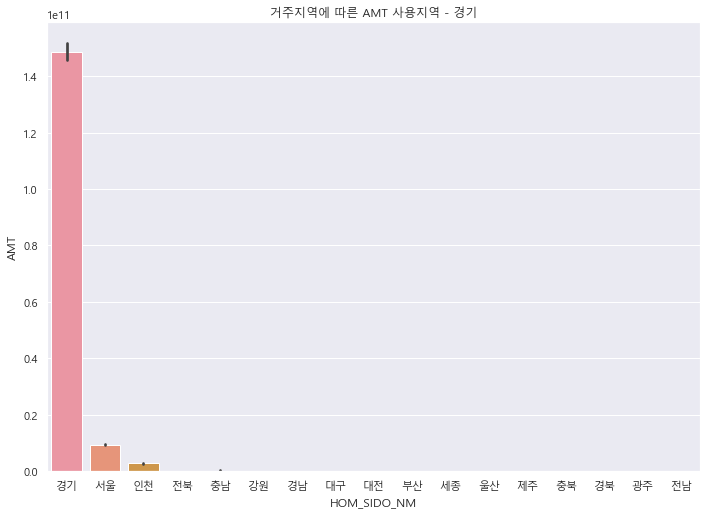

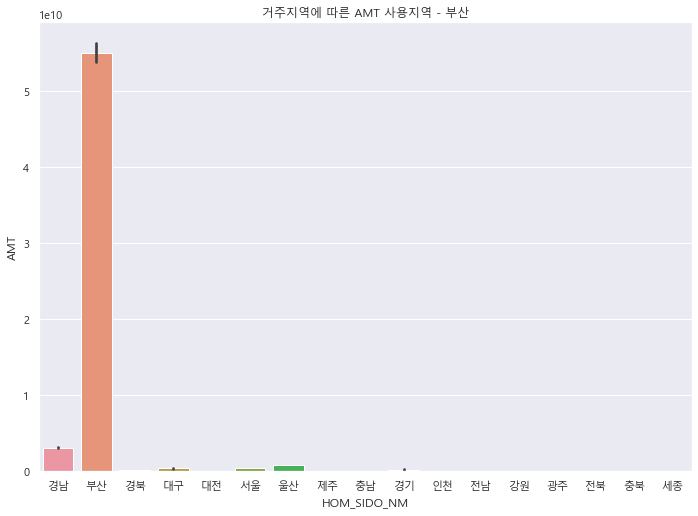

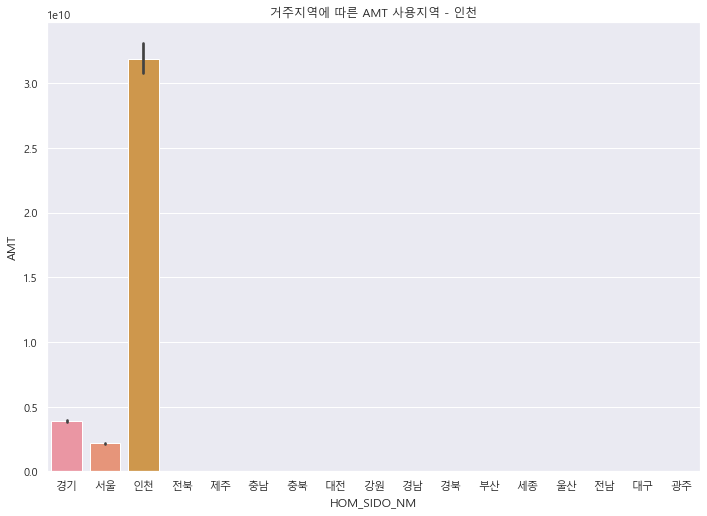

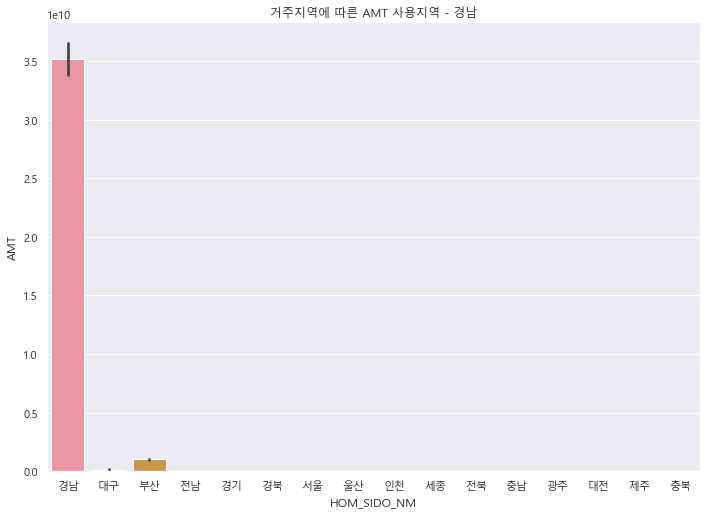

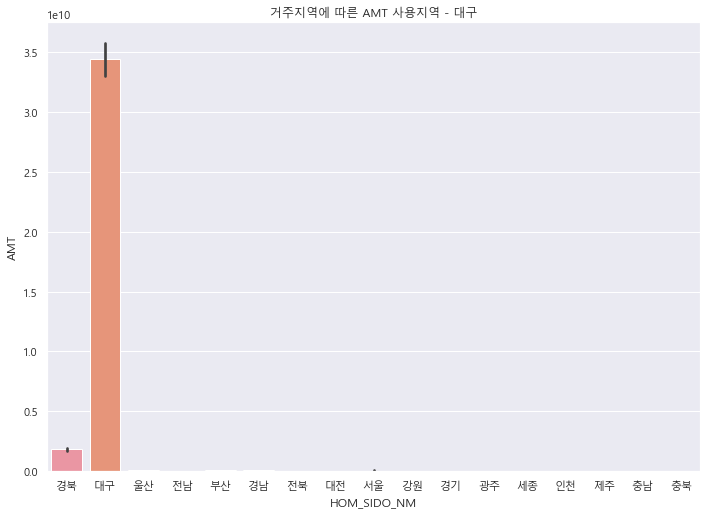

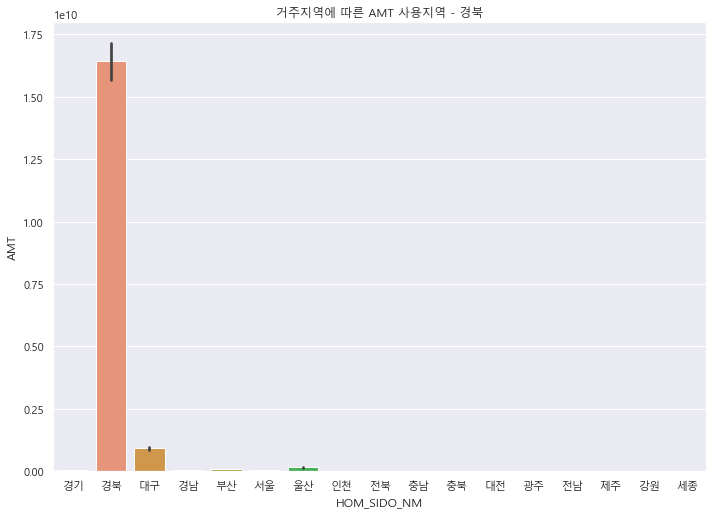

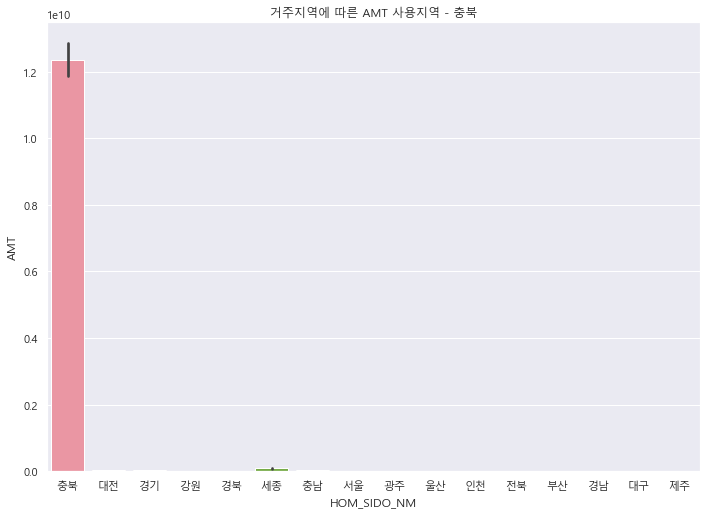

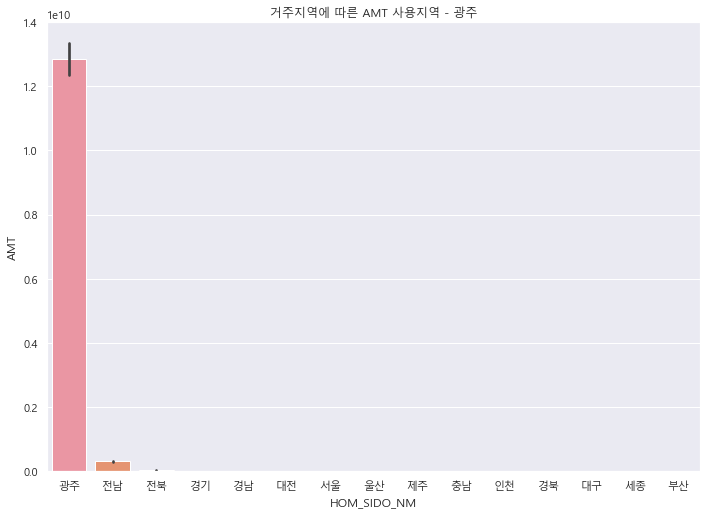

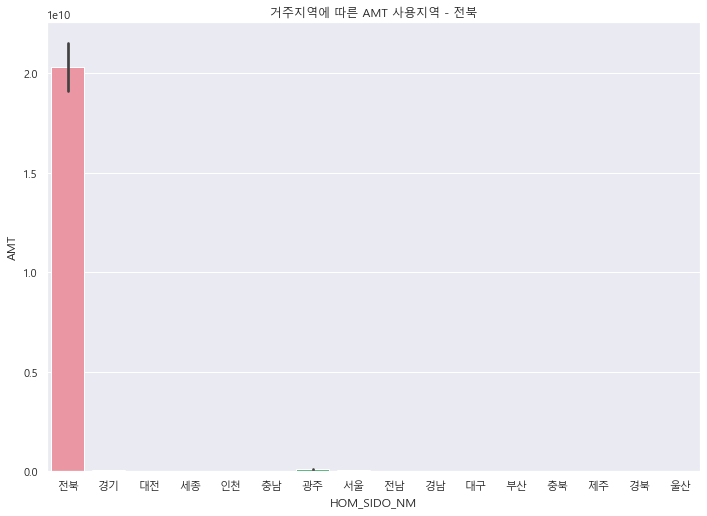

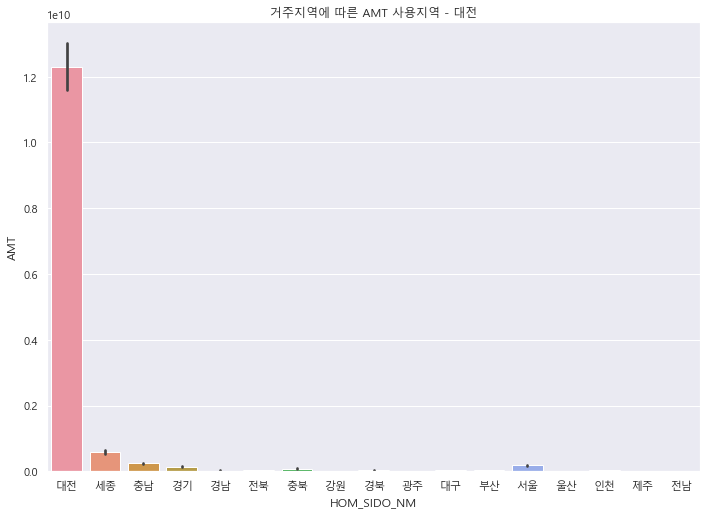

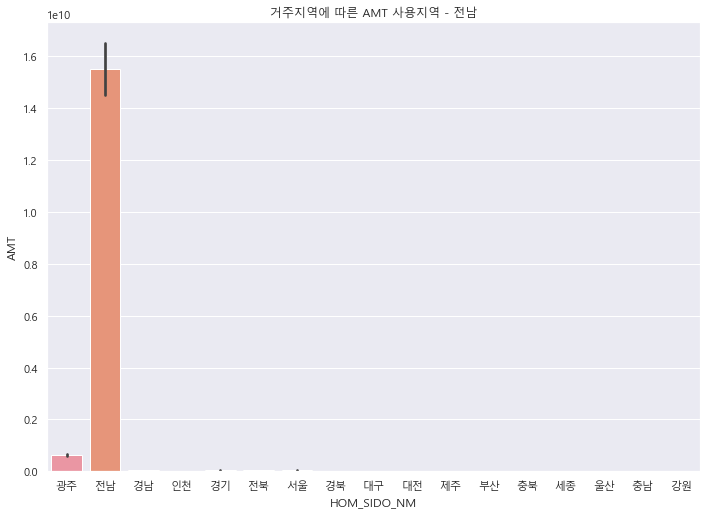

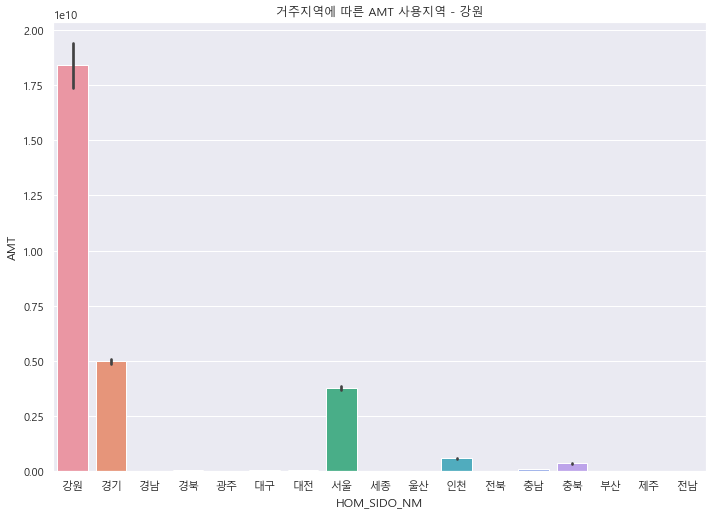

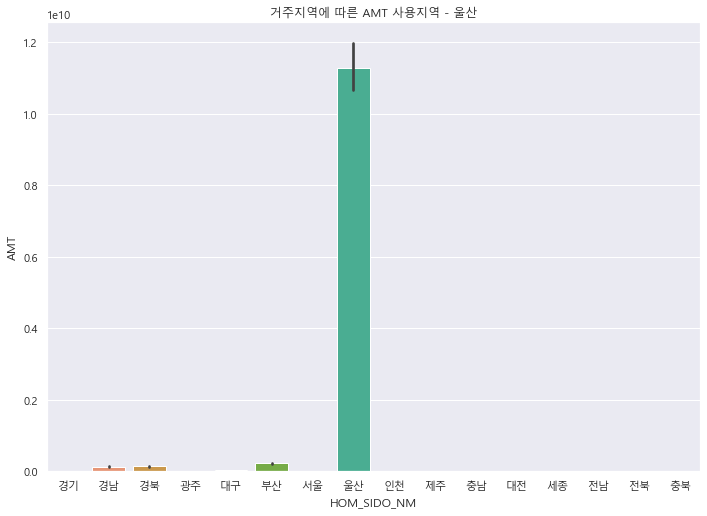

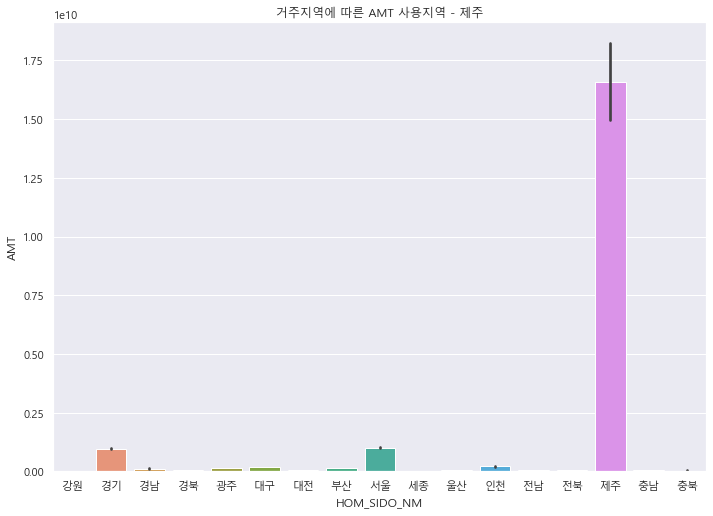

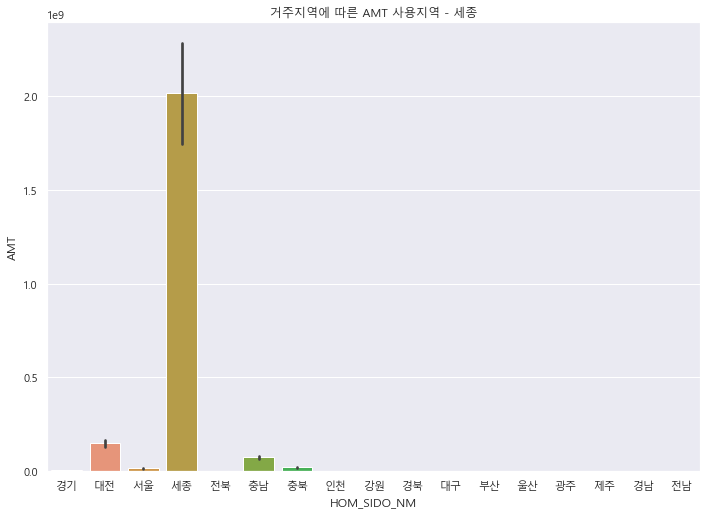

In [13]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()